# Финальный проект по первому курсу специализации "Машинное обучение и анализ данных"

In [295]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math

Для работы произвольно выберем непрерывное $\beta$-распределение, которое описывается как: 
$$f(x)=\frac{\gamma(a+b)x^{a-1}(1-x)^{b-1}}{\gamma(a)\gamma(b)}$$ при $0 \leqslant x \leqslant 1$, где $$\gamma(z)=\int\limits_{0}^{\infty}x^{z-1}e^{-x}dx$$

Для $\beta$-распределения математическое ожидание равно $\mu=\frac{a}{a+b}$, а дисперсия $\sigma^{2}=\frac{ab}{(a+b)^{2}(a+b+1)}$

Для наглядности создадим распределение с параметрами a=0.5, b=0.5. Это позволит получить распределение кардинально отличающееся от нормального.

In [319]:
# создаем распределение и генерируем случайную выборку объемом N=1000
a=0.5
b=0.5
e_rv=sts.beta(a,b)
e_rand=e_rv.rvs(size=1000)

Найдем математическое ожидание и дисперсию для распределения с такими параметрами

In [320]:
mu=a/(a+b)
sigma2=a*b/((a+b)**2*(a+b+1))
print ('mu=', mu, ' sigma2=', sigma2)

mu= 0.5  sigma2= 0.125


Таким образом математическое ожидание для нашего распределения $\mu=0.5$, а дисперсия $\sigma^{2}=0.125$

Построим гистограмму случайной выборки и теоретическую плотность распределения

Text(0.5,0,'$x$')

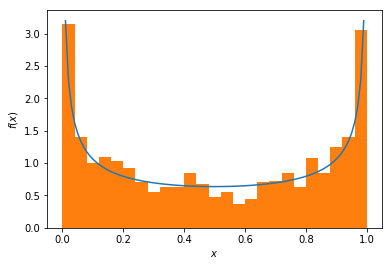

In [365]:
# рисуем графики
# поскольку работа ведется в ноутбуке Python3, параметр гистограммы normed заменен на density=True
x=np.linspace(0.01,0.99,100)
plt.plot (x, e_rv.pdf(x))
plt.hist(e_rand, bins=25, density=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Оценим распределение выборочного среднего по 1000 выборкам для разных n

Для наглядности при построении гистограмм будем использовать большое количество разбиений (bins=25).
Согласно Центральной предельной теореме дисперсия случайной выборки $\bar\sigma^{2}=\frac{\sigma^{2}}{n}$

## для n=3

Text(0.5,0,'$x$')

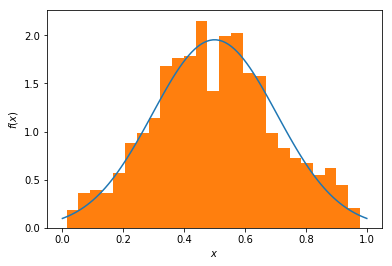

In [366]:
n=3
aver_array1=np.zeros(0) #создаем массив нулей
for i in range(1000):   #цикл генерации выборочных средних
    aver_array1=np.append(aver_array1,np.array([e_rv.rvs(size=n).mean()]))
#Строим гистограммы выборочных средних и нормальное распределение 
x=np.linspace(0,1,100)
plt.plot (x, sts.norm(mu,math.sqrt(sigma2/n)).pdf(x)) 
plt.hist(aver_array1, bins=25, density=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

## для n=5

Text(0.5,0,'$x$')

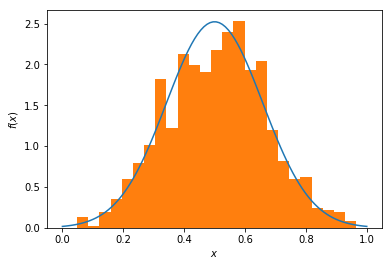

In [367]:
n=5
aver_array2=np.zeros(0)
for i in range(1000):
    aver_array2=np.append(aver_array2,np.array([e_rv.rvs(size=n).mean()]))
#Строим гистограммы выборочных средних и нормальное распределение 
x=np.linspace(0,1,100)
plt.plot (x, sts.norm(mu,math.sqrt(sigma2/n)).pdf(x)) 
plt.hist(aver_array2, bins=25, density=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# для n=10 

Text(0.5,0,'$x$')

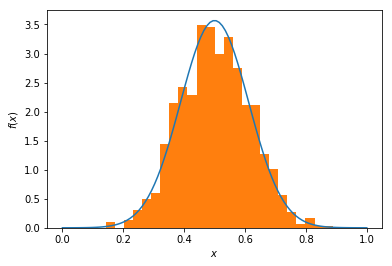

In [368]:
n=10
aver_array3=np.zeros(0)
for i in range(1000):
    aver_array3=np.append(aver_array3,np.array([e_rv.rvs(size=n).mean()]))
#Строим гистограммы выборочных средних и нормальное распределение 
x=np.linspace(0,1,100)
plt.plot (x, sts.norm(mu,math.sqrt(sigma2/n)).pdf(x)) 
plt.hist(aver_array3, bins=25, density=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# для n=50

Text(0.5,0,'$x$')

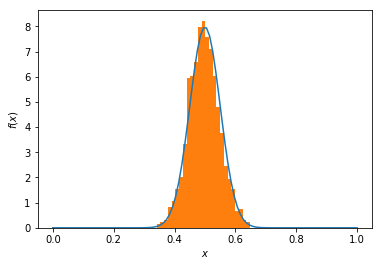

In [370]:
n=50
aver_array4=np.zeros(0)
for i in range(1000):
    aver_array4=np.append(aver_array4,np.array([e_rv.rvs(size=n).mean()]))
#Строим гистограммы выборочных средних и нормальное распределение 
x=np.linspace(0,1,100)
plt.plot (x, sts.norm(mu,math.sqrt(sigma2/n)).pdf(x)) 
plt.hist(aver_array4, bins=25, density=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Для оценки точности аппроксимации распределения выборочных средних нормальным распределением построим таблицу матожиданий и дисперсий и оценим их отклонение от теоретических значений нормального распределения

In [371]:
n=3
print ('n=',n,' mu_th=', mu, ' mu_dis=', str('%.5f'%aver_array1.mean()),
              ' disp_th=',str('%.5f'%(sigma2/n)), ' disp_dis=', str('%.5f'%aver_array1.var()),
              ' delta_mu=', str('%.5f'%(mu-aver_array1.mean())), ' delta_dis=', str('%.5f'%(sigma2/n-aver_array1.var()))) 
n=5
print ('n=',n,' mu_th=', mu, ' mu_dis=', str('%.5f'%aver_array2.mean()),
              ' disp_th=',str('%.5f'%(sigma2/n)), ' disp_dis=', str('%.5f'%aver_array2.var()),
              ' delta_mu=', str('%.5f'%(mu-aver_array2.mean())), ' delta_dis=', str('%.5f'%(sigma2/n-aver_array2.var()))) 
n=10
print ('n=',n,' mu_th=', mu, ' mu_dis=', str('%.5f'%aver_array3.mean()),
              ' disp_th=',str('%.5f'%(sigma2/n)), ' disp_dis=', str('%.5f'%aver_array3.var()),
              ' delta_mu=', str('%.5f'%(mu-aver_array3.mean())), ' delta_dis=', str('%.5f'%(sigma2/n-aver_array3.var()))) 
n=50
print ('n=',n,' mu_th=', mu, ' mu_dis=', str('%.5f'%aver_array4.mean()),
              ' disp_th=',str('%.5f'%(sigma2/n)), ' disp_dis=', str('%.5f'%aver_array4.var()),
              ' delta_mu=', str('%.5f'%(mu-aver_array4.mean())), ' delta_dis=', str('%.5f'%(sigma2/n-aver_array4.var()))) 

n= 3  mu_th= 0.5  mu_dis= 0.49893  disp_th= 0.04167  disp_dis= 0.04037  delta_mu= 0.00107  delta_dis= 0.00130
n= 5  mu_th= 0.5  mu_dis= 0.50542  disp_th= 0.02500  disp_dis= 0.02683  delta_mu= -0.00542  delta_dis= -0.00183
n= 10  mu_th= 0.5  mu_dis= 0.50236  disp_th= 0.01250  disp_dis= 0.01329  delta_mu= -0.00236  delta_dis= -0.00079
n= 50  mu_th= 0.5  mu_dis= 0.49665  disp_th= 0.00250  disp_dis= 0.00255  delta_mu= 0.00335  delta_dis= -0.00005


# Заключение

Для работы было $\beta$-распределение с параметрами $a=0.5$, $b=0.5$. Параметры были подобраны таким образом, чтобы получаемое распределение было максимально далеко от нормального. 
Как видно из графиков и последнего блока с оценкой отклонения значений матожидания и дисперсии видно что точность аппроксимации растет. Хотя даже для такого распределения выборка $n=5$ является достаточно хорошей и дальнейшее повышение объемов выборки вряд ли требуется. Однако, для других распределений картина может меняться.
В результате выполнения работы на практике была рассмотрена центральная предельная теорема и ее свойства для случайного распределения.